# Lab 2. Files and figures
#### Computational Methods for Geoscience - EPS 400/522
#### Instructor: Eric Lindsey
---------

When you are done with the lab, export it as an HTML or PDF file (File menu -> Save and export as), and turn it in along with your beautiful PDF map from question 5.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc

from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime

### Assignment 1: Ask the user for a number, then print the factorial of that number (Use np.math.factorial)

In [4]:
user_number = int(input("Please enter a number: "))
user_output = np.math.factorial(user_number)
print("The factorial for your input is", user_output)

The factorial for your input is 24


C:\Users\marzi\AppData\Local\Temp\ipykernel_18148\3760198673.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  user_output = np.math.factorial(user_number)


### Assignment 2: Download and read in a csv file of recent earthquakes

Go to [USGS Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search/) and conduct a search of your choice, but make sure it contains at least 1 magnitude 7 or larger event.

Under 'output options' change the format to 'CSV', it should download directly to your computer.

Now, read this file into python using Pandas, and print out just the 'time', 'latitude', 'longitude', 'depth' and 'mag' columns, for only the earthquakes over magnitude 7.

Hint: if you have a pandas data frame with lots of columns and only want to print some, you can give a list of just the ones you want to print like so:

    print(data[['col1','col2','col3']])

                         time  longitude  latitude  depth  mag
0    2010-12-15T18:22:23.540Z    -69.143   -17.679  136.6  5.1
1    2010-12-13T18:51:05.360Z    -73.080   -33.989   29.3  5.2
2    2010-11-29T19:57:53.880Z    -66.712   -24.012  182.1  5.2
3    2010-11-28T08:19:45.000Z    -72.043   -34.672   41.9  5.3
4    2010-11-25T04:54:46.000Z    -69.793   -25.060   28.7  5.0
..                        ...        ...       ...    ...  ...
437  2010-01-20T19:07:38.720Z    -65.809   -57.773   10.0  5.1
438  2010-01-19T17:28:15.360Z    -65.829   -27.584   26.8  5.2
439  2010-01-18T12:28:34.930Z    -68.599   -31.355   94.1  5.4
440  2010-01-17T12:00:01.080Z    -65.879   -57.664    5.0  6.3
441  2010-01-05T01:34:25.430Z    -74.034   -16.481   28.0  5.1

[442 rows x 5 columns]


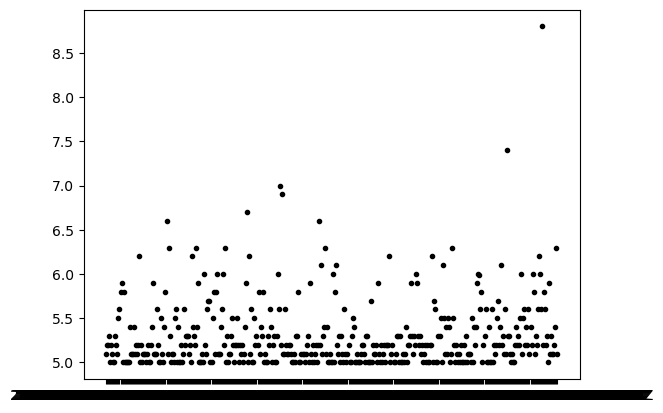

In [5]:
# Read in all data and make a quick plot.
data1=pd.read_csv('USGS_ChileEarthquakes_2010.csv')
print(data1[['time', 'longitude', 'latitude','depth', 'mag']])
plt.plot(data1['time'],data1['mag'],'k.') # notice I set the marker to black dots with 'k.'
plt.show()

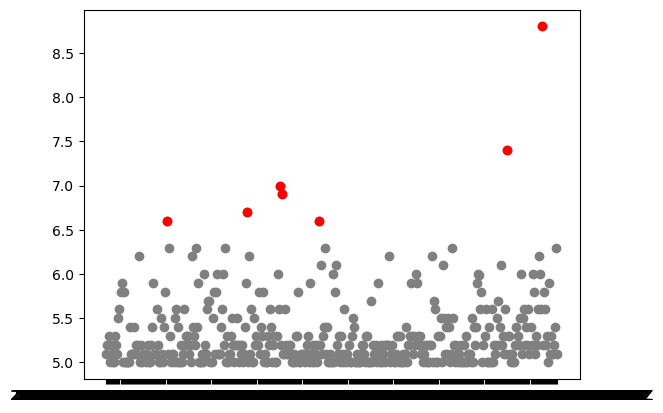

In [6]:
# Filter data to earthquakes with magnitudes higher than 6.5 (changed to include more earthquakes)
data1 = data1[['time', 'latitude', 'longitude', 'depth', 'mag']]
data1_filtered = data1[data1['mag'] >= 6.5]

# Scatter plot of filtered data against total earthquakes for the year
plt.scatter(data1['time'],data1['mag'], color='grey')
plt.scatter(data1_filtered['time'], data1_filtered['mag'], color='red')

### Assignment 3: plotting earthquakes

Plot the earthquakes from your USGS query above. The X and Y axes of the plot should be longitude and latitude, but you can choose how to represent depth, magnitude, time, etc. (choose at least 1 of these to represent). You could use color, marker size, 3D heights, etc. Don't go too crazy, but have fun! Take a look at some demos here, maybe copy one you like and modify it to your use: [MatPlotLib](https://matplotlib.org/stable/gallery/index.html)

In [ ]:
pip install basemap

In [ ]:
pip install cartopy

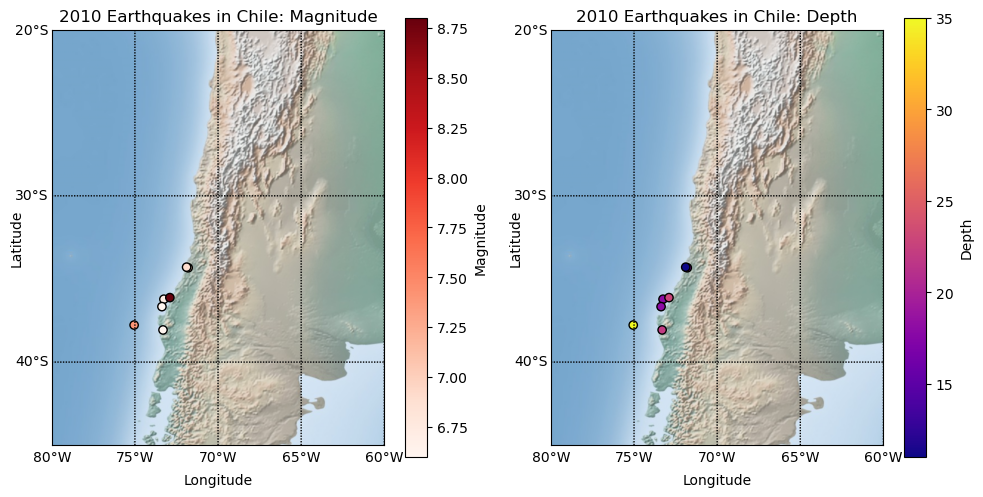

In [7]:
from mpl_toolkits.basemap import Basemap

# Set parameters for scatter plots
lons = data1_filtered['longitude']
lats = data1_filtered['latitude']
mag = data1_filtered['mag']
dep = data1_filtered['depth']

# Calculate the extent of the data for the basemap
#min_lon, max_lon = min(lons), max(lons)
#min_lat, max_lat = min(lats), max(lats)
min_lon, max_lon = -80, -60
min_lat, max_lat = -45, -20

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create the basemap for both subplots using the calculated extent
for ax in axes:
    m = Basemap(projection='cyl', ax=ax, llcrnrlon=min_lon, llcrnrlat=min_lat, urcrnrlon=max_lon, urcrnrlat=max_lat)
    m.shadedrelief()
    m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)  # Add latitude tick labels
    m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)  # Add longitude tick labels
    
# Create the first scatterplot with a colormap
sc1 = axes[0].scatter(lons, lats, c=mag, cmap='Reds', edgecolor='k')
axes[0].set_title('2010 Earthquakes in Chile: Magnitude')

# Create the second scatterplot with a different colormap
sc2 = axes[1].scatter(lons, lats, c=dep, cmap='plasma', edgecolor='k')
axes[1].set_title('2010 Earthquakes in Chile: Depth')

# Add colorbars for both scatterplots
cbar1 = fig.colorbar(sc1, ax=axes[0], orientation='vertical')
cbar1.set_label('Magnitude')
cbar2 = fig.colorbar(sc2, ax=axes[1], orientation='vertical')
cbar2.set_label('Depth')

# Set common labels for the subplots
for ax in axes:
    ax.set_xlabel('Longitude', labelpad=20)
    ax.set_ylabel('Latitude', labelpad=20)

plt.tight_layout()

### Assignment 4: Working with datetime

Plot the earthquake magnitudes from your query over time, making sure to take care of the 'datetime' formatting of both the data and the x-axis of the plot.

Hint: import the module 'datetime' and then use the function datetime.datetime.strptime() to convert the string-formatted dates into datetime objects.

This one may be tricky - use chatgpt or the datetime documentation to help!

In [ ]:
data1_filtered['time']

In [ ]:
# Convert 'time' column to proper string format for datetime.strptime()
# Option 1
date_string = ', '.join(data1_filtered['time'].tolist())
date_strings1 = date_string.split(', ')

# Option 2
date_strings2 = (', '.join(data1_filtered['time'].tolist())).split(', ')

print(date_strings1, date_strings2)

In [ ]:
# Define the format of the input string
format_string = "%Y-%m-%dT%H:%M:%S.%fZ"

# Input 'time' column from dataframe, in string format, split, and separated with commas
date_strings = (', '.join(data1_filtered['time'].tolist())).split(', ')

# Input string containing date and time information
#date_string = time_str # Replace with your date string

# Convert each date string to a datetime object
datetime_objects = []

for date_string in date_strings:
    datetime_obj = datetime.strptime(date_string, format_string)
    datetime_objects.append(datetime_obj) 

# Plot magnitude > 6.5 against time using datetime objects
plt.scatter(datetime_objects, mag, color='red')
plt.title('2010 Earthquakes in Chile: > Magnitude 6.5')
plt.xlabel('Date')
plt.ylabel('Magnitude')

### Assignment 5: Make a beautiful SST plot
Download the full monthly timeseries of sea surface temperatures from 1891 to present ('sst.mon.mean.nc', 156 MB) from [NOAA Physical Sciences Labratory](https://downloads.psl.noaa.gov/Datasets/COBE/).

Create a beautiful plot of last month's SST map, and use plt.savefig() to save it as a PDF to turn in alongside the lab. I will share my favorite next week - use creative colorschemes, plotting methods, or anything else unexpected!


In [ ]:
# Import necessary modules
import os
from pathlib import Path

# Get current working directory
current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")

In [8]:
path = 'C:/Users/marzi/Downloads/'
f_name = 'sst.mon.mean.nc'

sst_mean = nc.Dataset(path+f_name, 'r')

In [9]:
path = 'C:/Users/marzi/Downloads/'
f_name = 'sst.mon.mean.nc'

sst_mean = nc.Dataset(path+f_name, 'r')
print(sst_mean)

for var_name in sst_mean.variables:
    print(f"Variable: {var_name}")

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: COBE Sea Surface Temperature Analysis
    history: created June 2011 at ESRL/PSD using the grib data from JRA.
    platform: Analyses
    original_source: http://near-goos1.jodc.go.jp/cgi-bin/1997/near_goos_catalog?projectname=NEAR-GOOS
    Conventions: CF-1.2
    institution: NOAA ESRL/PSD
    comment: recent values (w/i last year) may change as dataset is updated. It is a monitoring dataset.
    dataset_title: COBE Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.cobe.html
    dimensions(sizes): lon(360), lat(180), time(1590)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 sst(time, lat, lon)
    groups: 
Variable: lat
Variable: lon
Variable: time
Variable: sst


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import datetime

# Step 1: Open the NetCDF file
file_path = 'C:/Users/marzi/Downloads/sst.mon.mean.nc'
nc = Dataset(file_path, 'r')

# Step 2: Extract time, latitude, and longitude data
time_var = nc.variables['time']  # Assuming the time variable is called 'time'
lat_var = nc.variables['lat']  # Replace with your latitude variable name
lon_var = nc.variables['lon']  # Replace with your longitude variable name

# Step 3: Define the date range
start_date = datetime.datetime(2022, 1, 1)  # Replace with your start date
end_date = datetime.datetime(2023, 6, 30)  # Replace with your end date

# Step 4: Convert the time values to Python datetime objects
time_units = nc.variables['time'].units
time_values = nc.variables['time'][:]
dates = [datetime.datetime.strptime(time_units, 'days since %Y-%m-%d %H:%M:%S') + datetime.timedelta(days=float(t)) for t in time_values]

# Step 5: Find the time indices corresponding to the date range
date_indices = [i for i, date in enumerate(dates) if start_date <= date <= end_date]

# Step 6: Extract surface temperature data for the specified date range
temperature_var = nc.variables['sst']  # Replace with your temperature variable name
temperature_data = temperature_var[date_indices, :, :]  # Assuming a 3D temperature array

# Step 7: Create a Basemap object
latitude_min = -80  # Replace with your minimum latitude
latitude_max = 84  # Replace with your maximum latitude
longitude_min = -180  # Replace with your minimum longitude
longitude_max = 180  # Replace with your maximum longitude

# Step 8: Create a Basemap object
m = Basemap(projection='merc', llcrnrlat=latitude_min, urcrnrlat=latitude_max,
            llcrnrlon=longitude_min, urcrnrlon=longitude_max, resolution='l')

# Step 9: Create a mesh grid for plotting
lon, lat = np.meshgrid(lon_var[:], lat_var[:])

# Step 10: Plot the surface temperature data
plt.figure(figsize=(8, 12))
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90., 91., 10.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 30.), labels=[0, 0, 0, 1])
levels = np.linspace(temperature_data.min(), temperature_data.max(), 100)
cs = m.contourf(lon, lat, temperature_data[0, :, :], levels=levels, cmap='coolwarm')

# Step 11: Add colorbar
cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('Sea Surface Temperature (K)')

# Step 12: Show the plot
plt.title('Sea Surface Temperature (SST)')
plt.show()

# Step 13: Close the NetCDF file
nc.close()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta

# Specify the path to your NetCDF file
netcdf_file = 'C:/Users/marzi/Downloads/sst.mon.mean.nc'

# Specify the date range you want to extract data for
start_date = datetime(2023, 1, 1)  # Replace with your start date
end_date = datetime(2023, 6, 30)  # Replace with your end date

# Open the NetCDF file
nc = Dataset(netcdf_file, 'r')

# Extract time and temperature data
time = nc.variables['time'][:]
temperature = nc.variables['sst'][:]  # Assuming 'sst' is the sea surface temperature variable name

# Convert time values to datetime objects
base_time = datetime.strptime(nc.variables['time'].units.split(' ')[-2], "%Y-%m-%d")
time = [base_time + timedelta(days=float(t)) for t in time]

# Create a mask to select data within the specified date range
date_mask = (np.array(time) >= start_date) & (np.array(time) <= end_date)
selected_time = np.array(time)[date_mask]
selected_temperature = temperature[date_mask, :, :]

# Close the NetCDF file
nc.close()

# Create a map projection
m = Basemap(projection='merc', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Create a grid of latitude and longitude values
lon, lat = np.meshgrid(nc.variables['lon'][:], nc.variables['lat'][:])

# Convert lat/lon values to map coordinates
x, y = m(lon, lat)

# Create a contour plot of sea surface temperature
plt.figure(figsize=(12, 8))
plt.title('Sea Surface Temperature')
c = m.contourf(x, y, selected_temperature[0, :, :], cmap=plt.cm.jet)
m.drawcoastlines()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0, 0, 0, 1])
plt.colorbar(c, label='Temperature (°C)')
plt.show()


RuntimeError: NetCDF: Not a valid ID

### Assignment 6. Interactive SST plot

Create an interactive plot of the whole SST timeseries, with a slider that allows you to scan through time. Make sure the title of the plot always reflects the month and year currently displayed (you'll have to work with the 'time' component of the NetCDF file. It is expressed as "days since 1891-01-01", so you will need to convert this into a nicer format. Check out the end of the matplotlib-help file for a clue on this!

Also, it may be clearer if you set the colorbar to have a fixed range so you can more easily see changes in the temperature over time. Use plt.clim() or ax.set_clim().